The task of the assignment #4 is Transfer Learning using a CNN pretrained on IMAGENET.

The suggested architecture is the VGG16, since AlexNet is not available in recent Keras versions.

The CNN should be used as fixed feature extractor on a new task of your choice containing a number of classes in the range from 3 to 10. 

The report must contain:
- a description of the new task and on the dataset used
- the use of the pretrained CNN as feature extractor considering different layers (at least 3 different choices)
- the chosen "classical" classifier
- for each transfer learning experiment:

the details about the chosen layer
the plot of the classification performance on train/val/test for the different layers considered
the hyper-parameters used for training the "classical" classifier

In [0]:
from keras.datasets import cifar10
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import keras

 
# Importing sklearn libraries
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, accuracy_score
 
 
# Importing Keras libraries
from keras.utils import np_utils
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint

 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Carico il dataset e seleziono solo 4 classi perchè con 10 ci mette troppo

In [0]:
(x_train_o, y_train_o), (x_test_o, y_test_o) = cifar10.load_data()

x_train = []
y_train = []
x_test = []
y_test = []



for i in range(0,50000):
  if(y_train_o[i] in [0,1,9,8]):
    x_train.append(x_train_o[i])
    y_train.append(y_train_o[i])

for i in range(0,10000):
  if(y_test_o[i] in [0,1,9,8]):
    x_test.append(x_test_o[i])
    y_test.append(y_test_o[i])

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)


print('\nX Train shape:', x_train.shape)
print('\nY Train shape:', y_train.shape)
print('\nX Test shape:', x_test.shape)
print('\nY Test shape:', y_test.shape)



170500096/170498071 [==============================] - 2s 0us/step

X Train shape: (20000, 32, 32, 3)

Y Train shape: (20000, 1)

X Test shape: (4000, 32, 32, 3)

Y Test shape: (4000, 1)


# Analisi del dataset


Training data available in x classes
[5000 5000 5000 5000]


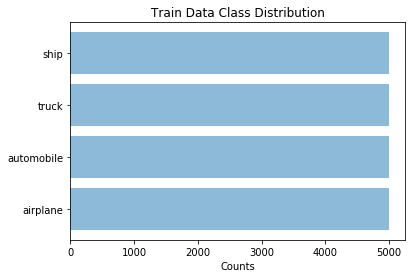

In [0]:
print("Training data available in x classes")
unique, counts = np.unique(y_train, return_counts=True)
print(counts)
 
image_classess = ('airplane','automobile','truck','ship')
 
y_pos = np.arange(len(image_classess))
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, image_classess)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')
plt.show()

In [0]:
y_train_categorical = keras.utils.to_categorical(y_train, 10) #specifico il numero di classi quindi 10
y_test_categorical = keras.utils.to_categorical(y_test, 10)

Il dataset è perfettamente ilanciato sulle 10 classi relativamente ai dati di train

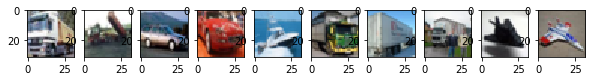

In [0]:
n = 10
plt.figure(figsize=(10, 10))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()

# VGG-16

Importo la VGG-16 e la taglio in 4 punti

In [0]:
from keras.models import Model

model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3)) #Include top evita di importare i dense layer

model.summary()

model2 = Model(model.input, model.layers[-5].output)
model2.summary()

model3 = Model(model2.input, model2.layers[-5].output)
model3.summary()

model4 = Model(model3.input, model3.layers[-5].output)
model4.summary()





58892288/58889256 [==============================] - 1s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
____________________________________________________

# FEATURE EXTRACTION 
Sui 4 tagli precedenti, sia del test che del train

In [0]:
from keras.applications.vgg16 import preprocess_input


print(x_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("TRAIN: ")

print("Predicting on model 1")
train_features_model1 = model.predict(x_train)
print("Predicting on model 2")
train_features_model2 = model2.predict(x_train)
print("Predicting on model 3")
train_features_model3 = model3.predict(x_train)
print("Predicting on model 4")
train_features_model4 = model4.predict(x_train)

print("TEST")

print("Predicting on model 1")
test_features_model1 = model.predict(x_test)
print("Predicting on model 2")
test_features_model2 = model2.predict(x_test)
print("Predicting on model 3")
test_features_model3 = model3.predict(x_test)
print("Predicting on model 4")
test_features_model4 = model4.predict(x_test)
print("END")



(20000, 32, 32, 3)
TRAIN: 
Predicting on model 1
Predicting on model 2
Predicting on model 3
Predicting on model 4
TEST
Predicting on model 1
Predicting on model 2
Predicting on model 3
Predicting on model 4
END


# Flattering dei dati

In [0]:
print(train_features_model1.shape)
print(train_features_model2.shape)
print(train_features_model3.shape)
print(train_features_model4.shape)
print("---")

train_features_model1_flatten = train_features_model1.reshape((train_features_model1.shape[0], train_features_model1.shape[1] * train_features_model1.shape[2] * train_features_model1.shape[3]))
train_features_model2_flatten = train_features_model2.reshape((train_features_model2.shape[0], train_features_model2.shape[1] * train_features_model2.shape[2] * train_features_model2.shape[3]))
train_features_model3_flatten = train_features_model3.reshape((train_features_model3.shape[0], train_features_model3.shape[1] * train_features_model3.shape[2] * train_features_model3.shape[3]))
train_features_model4_flatten = train_features_model4.reshape((train_features_model4.shape[0], train_features_model4.shape[1] * train_features_model4.shape[2] * train_features_model4.shape[3]))

test_features_model1_flatten = test_features_model1.reshape((test_features_model1.shape[0], test_features_model1.shape[1] * test_features_model1.shape[2] * test_features_model1.shape[3]))
test_features_model2_flatten = test_features_model2.reshape((test_features_model2.shape[0], test_features_model2.shape[1] * test_features_model2.shape[2] * test_features_model2.shape[3]))
test_features_model3_flatten = test_features_model3.reshape((test_features_model3.shape[0], test_features_model3.shape[1] * test_features_model3.shape[2] * test_features_model3.shape[3]))
test_features_model4_flatten = test_features_model4.reshape((test_features_model4.shape[0], test_features_model4.shape[1] * test_features_model4.shape[2] * test_features_model4.shape[3]))


print(train_features_model1_flatten.shape)
print(train_features_model2_flatten.shape)
print(train_features_model3_flatten.shape)
print(train_features_model4_flatten.shape)


(20000, 1, 1, 512)
(20000, 2, 2, 512)
(20000, 4, 4, 256)
(20000, 8, 8, 128)
---
(20000, 512)
(20000, 2048)
(20000, 4096)
(20000, 8192)


# TRANING sulle feature estratte precedentemente e PREDIZIONE sui dati di test
Operazione ripetuta per ogni taglio per confrontare le performance

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("SVM su model 1 in corso...")
svm_model_linear1 = SVC(kernel = 'linear', C = 1, verbose=True).fit(train_features_model1_flatten, y_train)
print("\nSVM su model 1 terminato\nPredizione sui dati di test...\n")
y_pred1 = svm_model_linear1.predict(test_features_model1_flatten)
acc1=accuracy_score(y_test, y_pred1)
print(classification_report(y_test, y_pred1, target_names=image_classess, digits=3))

print("SVM su model 2 in corso...")
svm_model_linear2 = SVC(kernel = 'linear', C = 1, verbose=True).fit(train_features_model2_flatten, y_train) 
print("\nSVM su model 2 terminato\nPredizione sui dati di test...\n")
y_pred2 = svm_model_linear2.predict(test_features_model2_flatten)
acc2=accuracy_score(y_test, y_pred2)
print(classification_report(y_test, y_pred2, target_names=image_classess, digits=3))

print("SVM su model 3 in corso...")
svm_model_linear3 = SVC(kernel = 'linear', C = 1, verbose=True).fit(train_features_model3_flatten, y_train) 
print("\nSVM su model 3 terminato\nPredizione sui dati di test...\n")
y_pred3 = svm_model_linear3.predict(test_features_model3_flatten)
acc3=accuracy_score(y_test, y_pred3)
print(classification_report(y_test, y_pred3, target_names=image_classess, digits=3))

print("SVM su model 4 in corso...")
svm_model_linear4 = SVC(kernel = 'linear', C = 1, verbose=True).fit(train_features_model4_flatten, y_train) 
print("\nSVM su model 3 terminato\nPredizione sui dati di test...\n")
y_pred4 = svm_model_linear4.predict(test_features_model4_flatten)
acc4=accuracy_score(y_test, y_pred4)
print(classification_report(y_test, y_pred4, target_names=image_classess, digits=3))



SVM su model 1 in corso...
[LibSVM]
SVM su model 1 terminato
Predizione sui dati di test...

              precision    recall  f1-score   support

    airplane      0.760     0.775     0.767      1000
  automobile      0.735     0.743     0.739      1000
       truck      0.754     0.740     0.747      1000
        ship      0.733     0.723     0.728      1000

    accuracy                          0.745      4000
   macro avg      0.745     0.745     0.745      4000
weighted avg      0.745     0.745     0.745      4000

SVM su model 2 in corso...
[LibSVM]
SVM su model 2 terminato
Predizione sui dati di test...

              precision    recall  f1-score   support

    airplane      0.787     0.867     0.825      1000
  automobile      0.807     0.806     0.806      1000
       truck      0.859     0.826     0.842      1000
        ship      0.815     0.764     0.789      1000

    accuracy                          0.816      4000
   macro avg      0.817     0.816     0.816      4000

# Confronto grafico delle performance 

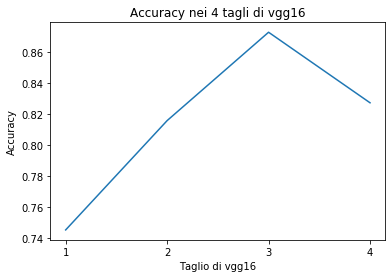

In [0]:
import matplotlib.pyplot as plt
plt.title("Accuracy nei 4 tagli di vgg16")
plt.xlabel('Taglio di vgg16')
plt.ylabel('Accuracy')
plt.plot(["1", "2", "3", "4"], [float(acc1), float(acc2), float(acc3), float(acc4)])
plt.ylabel('Accuracy')
plt.show()

# Plot di alcune immagini di test con relativa etichetta predetta

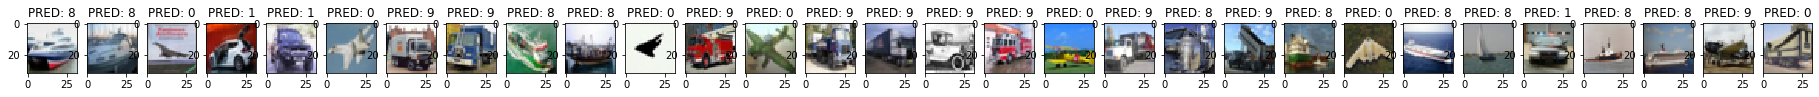

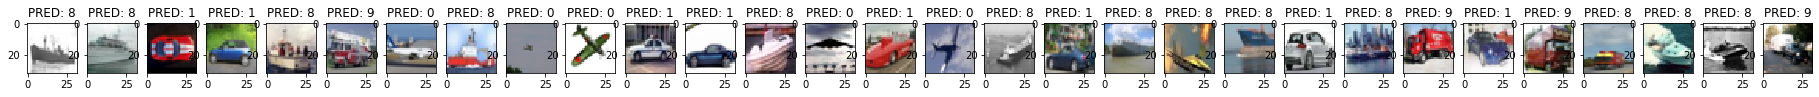

In [0]:

n = 30
plt.figure(figsize=(32, 32))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("PRED: %s" %(y_pred3[i]))
    plt.imshow(x_test[i])
    plt.gray()
    
n = 60
plt.figure(figsize=(32, 32))
for i in range(30, n):
    ax = plt.subplot(2, n-30, i + 1)
    ax.set_title("PRED: %s" %(y_pred3[i]))
    plt.imshow(x_test[i])
    plt.gray()